In [11]:
import pandas as pd
import seaborn as sns

df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [12]:
df['tip_normalized'] = df['tip'] / df['total_bill']
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_normalized
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [13]:
PATH = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df   = pd.read_csv(PATH, index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
df['personal_title'] = df.Name.str.extract('.+, (.+?)\.', expand=False)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,personal_title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


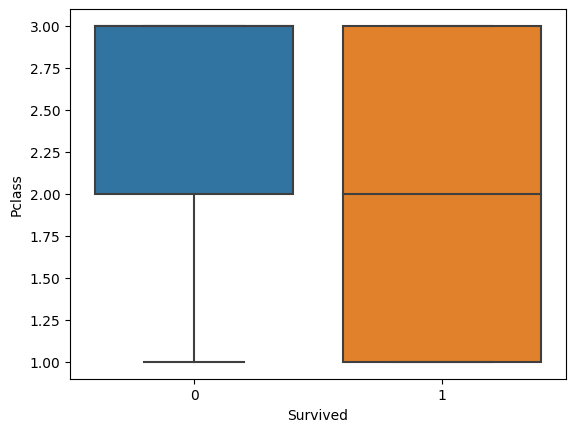

In [15]:
sns.boxplot(data=df, x='Survived', y='Pclass');

In [16]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

df_model = df.drop(columns=['Name', 'Ticket', 'Cabin', 'Sex', 'personal_title', 'Embarked']).dropna()
df_model.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500


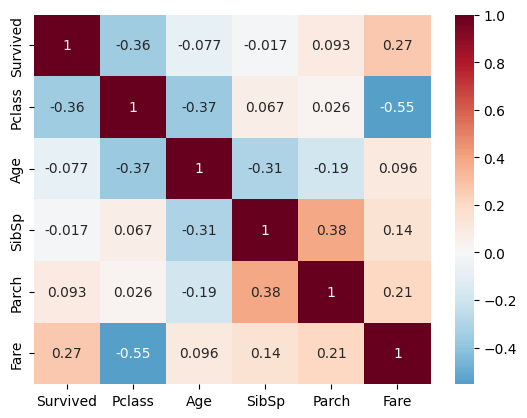

In [17]:
sns.heatmap(df_model.corr(), cmap='RdBu_r', center=0, annot=True);

In [18]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

df_model = df.drop(columns=['Name', 'Ticket', 'Cabin']).dropna()
df_model.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,Mr
2,1,1,female,38.0,1,0,71.2833,C,Mrs
3,1,3,female,26.0,0,0,7.9250,S,Miss
4,1,1,female,35.0,1,0,53.1000,S,Mrs
5,0,3,male,35.0,0,0,8.0500,S,Mr


In [20]:
target = df_model['Survived']
df_features = df_model.drop(columns='Survived')

In [21]:
cat_cols = df_features.select_dtypes(exclude='number').columns

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
df_features[cat_cols] = encoder.fit_transform(df_features[cat_cols]).astype(int)

df_features.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,personal_title
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,2,11
2,1,0,38.0,1,0,71.2833,0,12
3,3,0,26.0,0,0,7.9250,2,8
4,1,0,35.0,1,0,53.1000,2,12
5,3,1,35.0,0,0,8.0500,2,11


In [22]:
discrete_features = df_features.dtypes==int
discrete_features

Pclass            False
Sex                True
Age               False
SibSp             False
Parch             False
Fare              False
Embarked           True
personal_title     True
dtype: bool

In [26]:
scores = mutual_info_classif(X=df_features, y=target, discrete_features=discrete_features)
scores

array([0.04531162, 0.14840857, 0.02034645, 0.00075153, 0.00193932,
       0.13217121, 0.01930984, 0.17785974])

<Axes: >

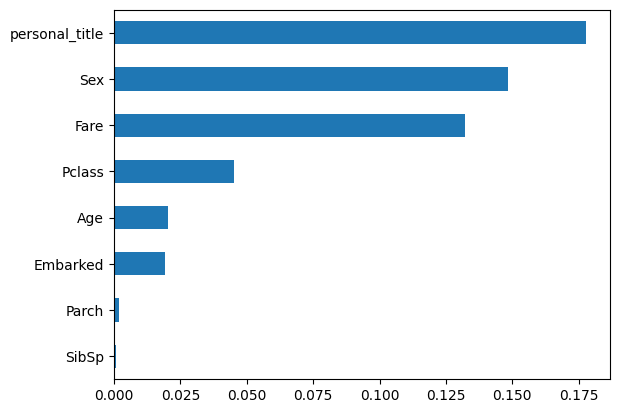

In [28]:
pd.Series(data=scores, index=df_features.columns).sort_values().plot.barh()